<h1 style="text-align: center;">Desafío - Clasificación desde la econometría</h1>

- Para realizar este desafío debes haber estudiado previamente todo el material disponible correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo del desafío: individual
- Para la realización del desafío necesitarás apoyarte del archivo `Apoyo Desafío - Clasificación desde la econometría`, disponible en la <a href="https://empieza.desafiolatam.com/cohorts/2091/sections/78288/activities/119116/items/610922">plataforma</a>.

## Descripción
En esta sesión trabajaremos el dataset south african heart, el cual contiene las siguientes variables:
- `sbp`: Presión Sanguínea Sistólica.
- `tobacco`: Promedio tabaco consumido por día.
- `ldl`: Lipoproteína de baja densidad.
- `adiposity`: Adiposidad.
- `famhist`: Antecedentes familiares de enfermedades cardiácas. (Binaria)
- `types`: Personalidad tipo A
- `obesity`: Obesidad.
- `alcohol`: Consumo actual de alcohol.
- `age`: edad.
- `chd`: Enfermedad coronaria. (dummy). **Vector objetivo**.

### Desafío 1: Preparar el ambiente de trabajo
- Cargue las librerías básicas para importación y manipulación de datos (numpy, pandas), gráficos (matplotlib y seaborn) y de modelación econométrica (statsmodels).
- Importe el archivo `southafricanheart.csv` que se encuentra dentro del material de apoyo.

In [78]:
# Utiliza esta celda para importar los módulos solicitados y el set de datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings 

warnings.simplefilter('ignore')

df = pd.read_csv('southafricanheart.csv').drop(['Unnamed: 0'], axis=1)
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


- Realice una descripción del set importado mostrando la lista con los nombres de variables importadas

In [79]:
# Utiliza esta celda para mostrar los nombres de las columnas del dataframe

df.columns

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age', 'chd'],
      dtype='object')

- Muestre un análisis descriptivo mediante .describe()

In [80]:
# Utiliza esta celda para aplicar describe()

df.describe(include=['object', np.number]).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sbp,462,NaN,NaN,NaN,138.327,20.4963,101,124,134,148,218
tobacco,462,NaN,NaN,NaN,3.63565,4.59302,0,0.0525,2,5.5,31.2
ldl,462,NaN,NaN,NaN,4.74032,2.07091,0.98,3.2825,4.34,5.79,15.33
adiposity,462,NaN,NaN,NaN,25.4067,7.7807,6.74,19.775,26.115,31.2275,42.49
famhist,462,2,Absent,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN
typea,462,NaN,NaN,NaN,53.1039,9.81753,13,47,53,60,78
obesity,462,NaN,NaN,NaN,26.0441,4.21368,14.7,22.985,25.805,28.4975,46.58
alcohol,462,NaN,NaN,NaN,17.0444,24.4811,0,0.51,7.51,23.8925,147.19
age,462,NaN,NaN,NaN,42.816,14.609,15,31,45,55,64
chd,462,NaN,NaN,NaN,0.34632,0.476313,0,0,0,1,1


**Comentarios de las variables continuas**

**<font color='green'>En base a las variables continuas, vemos que sus magnitudes son variadas y dado que no estan estandarizadas, es dificil hacer una comparacion entre ellas. En cuanto a las variable categorica hamhist, esta solo posee dos valores, donde la más frecuente es Absent con una frecuencia de 270 apariciones.</font>**

- Muestre distribución de categorías para las variables `famhist` y `chd`.

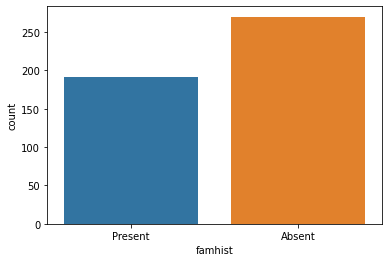

In [81]:
# Utiliza esta celda para mostrar las frecuencias de famhist con un gráfico de barras

sns.countplot(df['famhist']);

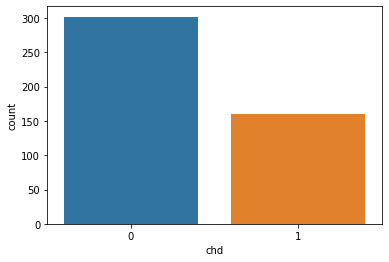

In [82]:
# Utiliza esta celda para mostrar las frecuencias de chd con un gráfico de barras

sns.countplot(df['chd']);

**Comentarios de las variables categóricas**

**<font color='green'>Para el primer gráfico, se muestra lo ya antes mencionado en el descriptivo, donde hay una mayor cantidad de personas que presentan antecedentes familiares de enfermedades cardiacas. Para nuetra variable objetivo, una mayor cantidad de personas no presenta enfermedades coronarias.</font>**

## Desafío 2

A continuación se presenta el siguiente modelo a estimar:

$$
\log\left(\frac{p(\text{chd}=1)}{1-p(\text{chd}=1)}\right)_i=\beta_0 + \beta_{famhist} \cdot \text{famhist}_i
$$

Para ello ejecute los siguientes pasos:
1. Recodifique `famhist` a dummy, asignando 1 a la categoría minoritaria.

In [83]:
# Utiliza esta celda para realizar la codificación solicitada

df['famhist'] = np.where(df['famhist'] == 'Present', 1, 0)
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


2. Utilice `smf.logit` para estimar el modelo.

In [84]:
# Utiliza esta celda para instanciar y entrenar el modelo solicitado

model_logit = smf.logit('chd ~ famhist', data=df).fit()
model_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.608111
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.057     
Dependent Variable: chd              AIC:              565.8944  
Date:               2022-10-31 18:17 BIC:              574.1655  
No. Observations:   462              Log-Likelihood:   -280.95   
Df Model:           1                LL-Null:          -298.05   
Df Residuals:       460              LLR p-value:      4.9371e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -1.1690    0.1431  -8.1687  0.0000  -1.4495  -0.8885
famhist        1.1690    0.2033   5.7514  0.0000   0.7706   1.5674
=================================================================

"""

3. Implemente una función `inverse_logit` que realice el mapeo de log-odds a probabilidad.

In [142]:
# Utiliza esta celda para implementar la función solicitada

def inverse_logit(vector_x):
    """
        Objetivo:
            - Obtener la probabilidad para una regresion logistica
        Parámetros:
            - vector_x (float): calculo del vector x

        Retorno:
           - probabilidad (float)
    """

    return 1/(1+np.exp(-vector_x))

4.  Con el modelo estimado, responda lo siguiente:
- ¿Cuál es la probabilidad de un individuo con antecedentes familiares de tener una enfermedad coronaria?

In [143]:
# Utiliza esta celda para obtener los log odds en base a los coeficientes, cuando famhist=1.
log_odd = -1.1690 + 1.1690*1

# Obtener además la probabilidad utilizando inverse_logit
probabilidad_1 = inverse_logit(log_odd)
print(f'La probabilidad de un individuo con antecedentes familiares de tener una enfermedad coronaria es de un {probabilidad_1}')

La probabilidad de un individuo con antecedentes familiares de tener una enfermedad coronaria es de un 0.5


¿Cuál es la probabilidad de un individuo sin antecedentes familiares de tener
una enfermedad coronaria?

In [144]:
# Utiliza esta celda para obtener los log odds en base a los coeficientes, cuando famhist=0.
log_odd = -1.1690 + 1.1690*0

# Obtener además la probabilidad utilizando inverse_logit
probabilidad_0 = inverse_logit(log_odd)
print(f'La probabilidad de un individuo sin antecedentes familiares de tener una enfermedad coronaria es de un {probabilidad_0:.2f}')

La probabilidad de un individuo sin antecedentes familiares de tener una enfermedad coronaria es de un 0.24


- ¿Cuál es la diferencia en la probabilidad entre un individuo con antecedentes y otro sin antecedentes?

In [145]:
# Utiliza esta celda para mostrar las diferencias de ambas probabilidades

print(f'La diferencia en la probabilidad entre un individuo con antecedentes y otro sin antecedentes es de un {probabilidad_1 - probabilidad_0:.2f}')

La diferencia en la probabilidad entre un individuo con antecedentes y otro sin antecedentes es de un 0.26


- Replique el modelo con smf.ols y comente las similitudes entre los coeficientes estimados. _Tip: Utilice $\beta$/4_

In [146]:
# Utiliza esta celda para entrenar el modelo ols y mostrar los coeficientes

model_ols = smf.ols('chd ~ famhist', data=df).fit()
print(f"Modelo OLS \n{model_ols.summary2().tables[1]['Coef.']}")
print('-'*30)
print(f"Modelo Logit \n{model_logit.summary2().tables[1]['Coef.']/4}")


Modelo OLS 
Intercept    0.237037
famhist      0.262963
Name: Coef., dtype: float64
------------------------------
Modelo Logit 
Intercept   -0.292248
famhist      0.292248
Name: Coef., dtype: float64


**Respuesta**

**<font color='green'>El valor obtenido al dividir el coeficiente estimado con logit por 4 es similar al valor del coeficiente obtenido con mínimos cuadrados</font>**

### Desafío 3: Estimación completa

Implemente un modelo con la siguiente forma:

$$
\log\left(\frac{p(\text{chd}=1)}{1-p(\text{chd}=1)}\right)_i=\beta_0 + \sum_{j=1}^{n}\beta_j \cdot X_{ji}
$$

In [91]:
# Utiliza esta celda para entrenar el modelo solicitado

model_full = smf.logit(f'chd ~ {" + ".join(df.columns.drop(["chd"]))}', data=df).fit()
model_full.summary2()

Optimization terminated successfully.
         Current function value: 0.510974
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.208     
Dependent Variable: chd              AIC:              492.1400  
Date:               2022-10-31 18:18 BIC:              533.4957  
No. Observations:   462              Log-Likelihood:   -236.07   
Df Model:           9                LL-Null:          -298.05   
Df Residuals:       452              LLR p-value:      2.0548e-22
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -6.1507    1.3083  -4.7015  0.0000  -8.7149  -3.5866
sbp            0.0065    0.0057   1.1350  0.2564  -0.0047   0.0177
tobacco        0.0794    0.0266   2.9838  0.0028   0.0272   0.1315
ldl            0.1739    0.0597   2.9152  0.0036   0.0570   0.2909
adiposity      0.0186    0.0293   0.6346  0.5257  -0.0388   0.0760
famhist        0.9254    0.2279   4.0605  0.0000   0.4787   1.3720
typea          0.0396    0.0123   3.2138  0.0013   0.0154   0.0637
obesity       -0.0629    0.0442  -1.4218  0.1551  -0.1496   0.0238
alcohol        0.0001    0.0045   0.0271  0.9784  -0.0087   0.0089
age            0.0452    0.0121   3.7285  0.0002   0.0215   0.0690
=================================================================

"""

- Depure el modelo manteniendo las variables con significancia estadística al 5%.

In [92]:
# Utiliza esta celda para mostrar los coeficientes con significancia estadística al 5%

table = model_full.summary2().tables[1]
table_05 = table[table['P>|z|'] <= 0.05]
table_05

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-6.150721,1.308260,-4.701451,0.000003,-8.714863,-3.586578
tobacco,0.079376,0.026603,2.983758,0.002847,0.027236,0.131517
ldl,0.173924,0.059662,2.915166,0.003555,0.056989,0.290859
famhist,0.925370,0.227894,4.060530,0.000049,0.478706,1.372034
typea,0.039595,0.012320,3.213823,0.001310,0.015448,0.063742
age,0.045225,0.012130,3.728464,0.000193,0.021451,0.068999


In [93]:
# Utiliza esta celda para entrenar el modelo depurado

model_depurado = smf.logit(f'chd ~ {" + ".join(table_05.index.drop("Intercept"))}', data=df).fit()
model_depurado.summary2()

Optimization terminated successfully.
         Current function value: 0.514811
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.202     
Dependent Variable: chd              AIC:              487.6856  
Date:               2022-10-31 18:18 BIC:              512.4990  
No. Observations:   462              Log-Likelihood:   -237.84   
Df Model:           5                LL-Null:          -298.05   
Df Residuals:       456              LLR p-value:      2.5537e-24
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -6.4464    0.9209  -7.0004  0.0000  -8.2513  -4.6416
tobacco        0.0804    0.0259   3.1057  0.0019   0.0297   0.1311
ldl            0.1620    0.0550   2.9470  0.0032   0.0543   0.2697
famhist        0.9082    0.2258   4.0228  0.0001   0.4657   1.3507
typea          0.0371    0.0122   3.0505  0.0023   0.0133   0.0610
age            0.0505    0.0102   4.9442  0.0000   0.0305   0.0705
=================================================================

"""

- Compare los estadísticos de bondad de ajuste entre ambos.

In [94]:
# Utiliza esta celda para mostrar los estadísticos de bondad de ajuste del primer modelo

model_full.summary2().tables[0]

,0,1,2,3
0,Model:,Logit,Pseudo R-squared:,0.208
1,Dependent Variable:,chd,AIC:,492.1400
2,Date:,2022-10-31 18:18,BIC:,533.4957
3,No. Observations:,462,Log-Likelihood:,-236.07
4,Df Model:,9,LL-Null:,-298.05
5,Df Residuals:,452,LLR p-value:,2.0548e-22
6,Converged:,1.0000,Scale:,1.0000
7,No. Iterations:,6.0000,,


In [95]:
# Utiliza esta celda para mostrar los estadísticos de bondad de ajuste del segundo modelo

model_depurado.summary2().tables[0]

,0,1,2,3
0,Model:,Logit,Pseudo R-squared:,0.202
1,Dependent Variable:,chd,AIC:,487.6856
2,Date:,2022-10-31 18:18,BIC:,512.4990
3,No. Observations:,462,Log-Likelihood:,-237.84
4,Df Model:,5,LL-Null:,-298.05
5,Df Residuals:,456,LLR p-value:,2.5537e-24
6,Converged:,1.0000,Scale:,1.0000
7,No. Iterations:,6.0000,,


**Respuesta**

**<font color='green'>La log verosimilitud es levemente menor en el modelo full, por lo que podriamos decir que el modelo full es mejor que el modelo depurado.</font>**


- Reporte de forma sucinta el efecto de las variables en el log-odds de tener una enfermedad coronaria

In [96]:
# Utiliza esta celda para mostrar los coeficientes significativos que afectan positivamente

table_dep = model_depurado.summary2().tables[1]
table_dep[table_dep['Coef.'] > 0]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
tobacco,0.080375,0.025880,3.105731,1.898095e-03,0.029652,0.131099
ldl,0.161992,0.054969,2.946967,3.209075e-03,0.054255,0.269729
famhist,0.908175,0.225758,4.022774,5.751661e-05,0.465697,1.350654
typea,0.037115,0.012167,3.050542,2.284291e-03,0.013269,0.060962
age,0.050460,0.010206,4.944159,7.647332e-07,0.030457,0.070464


In [97]:
# Utiliza esta celda para mostrar los coeficientes significativos que afectan negativamente

table_dep[table_dep['Coef.'] < 0]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-6.446445,0.920872,-7.000372,2.552836e-12,-8.25132,-4.641569


**Respuesta**
- **<font color='green'>Las variables que tienen un efecto positivo (significativo) en el riesgo de tener una enfermedad coronaria son el hecho de fumar, tener un valor de ldl alto, tener antecedentes familiares, tener personalidad tipo a, y tener mayor edad.</font>**
- **<font color='green'>Entre las variables explicativas del dataframe, no existe ninguna la cual tenga un efecto negativo (significativo) en la prediccion de nuestro target, solo el intercepto es negativo pero este no pertenece o no tiene asociada ninguna variable.</font>**

### Desafío 4: Estimación de perfiles
A partir del modelo depurado, genere las estimaciones en log-odds y posteriormente transfórmelas a probabilidades con `inverse_logit`. Los perfiles a estimar son los
siguientes:

- La probabilidad de tener una enfermedad coronaria para un individuo con características similares a la muestra.

In [147]:
# Creamos una funcion para calcular dichas probabilidades

def prob_enfermedad_coronaria(data, valor_ldl = False , valor_famhist = 1):
    """
        Objetivo:
            - Obtener la probabilidad de tener una enfermedad coronaria para un individuo promedio segun el modelo depurado, dejando como variables las variables famhist y ldl.
        Parámetros:
            - data (dataframe): Dataframe donde se encuentran las variables
            - valor_ldl (string): valor que debe tomar la variable ldl. En este caso solo pueden ser 3 valores posibles: 
                    - Alto si se quiere un alto nivel de lopoproteína de baja densidad. Este valor será del quartil 75
                    - Bajo si se quiere un bajo nivel de lopoproteína de baja densidad. Este valor será del quartil 75
                    - False se solo se quiere la media de la variable
            - valor_famhist (int): reemplazar segun si la persona posee antecedentes familiares de enfermedades cardiácas: 1 si es que lo posee, 0 en caso contrario

        Retorno:
           - probabilidad de tener una enfermedad coronaria (float)
    """

    tobacco_mean = data['tobacco'].mean()
    famhist_present = valor_famhist
    typea_mean = data['typea'].mean()
    age_mean = data['age'].mean()

    if valor_ldl == False:
        ldl_mean = data['ldl'].mean()
    elif valor_ldl == 'Alto':
        ldl_mean = df['ldl'].quantile(.75)
    elif valor_ldl == 'Bajo':
        ldl_mean = df['ldl'].quantile(.25)
        
    odds = model_depurado.params*np.array([1, tobacco_mean, ldl_mean, famhist_present, typea_mean, age_mean])

    return inverse_logit(odds.sum())

In [148]:
# Utiliza esta celda para mostrar la probabilidad de un invidivuo promedio con antecedentes familiares

prob_enfermedad_coronaria(df, valor_famhist=1)


0.41418659081821735

In [149]:
# Utiliza esta celda para mostrar la probabilidad de un individuo promedio sin antecedentes familiares

prob_enfermedad_coronaria(df, valor_famhist=0)

0.22185998096946388

- La probabilidad de tener una enfermedad coronaria para un individuo con altos niveles de lipoproteína de baja densidad, _manteniendo todas las demás características constantes_.

In [150]:
# Utiliza esta celda para mostrar la probabilidad de un invidivuo promedio con antecedentes familiares y un alto nivel de lopoproteína de baja densidad

prob_enfermedad_coronaria(df, valor_ldl='Alto', valor_famhist=1)

0.4559529452265043

In [151]:
# Utiliza esta celda para mostrar la probabilidad de un invidivuo promedio sin antecedentes familiares y un alto nivel de lopoproteína de baja densidad

prob_enfermedad_coronaria(df, valor_ldl='Alto', valor_famhist=0)

0.2525946978599806

- La probabilidad de tener una enfermedad coronaria para un individuo con bajos niveles de lipoproteína de baja densidad, _manteniendo todas las demás características constantes_.

In [152]:
# Utiliza esta celda para mostrar la probabilidad de un invidivuo promedio con antecedentes familiares y un bajo nivel de lopoproteína de baja densidad

prob_enfermedad_coronaria(df, valor_ldl='Bajo', valor_famhist=1)

0.3582793365570518

In [153]:
# Utiliza esta celda para mostrar la probabilidad de un invidivuo promedio sin antecedentes familiares y un bajo nivel de lopoproteína de baja densidad

prob_enfermedad_coronaria(df, valor_ldl='Bajo', valor_famhist=0)

0.18376936761768622